# بر یادگیری ماشین و شبکه‌های عصبی

یادگیری ماشین در سال‌های اخیر به یکی از ابزارهای کلیدی در تحلیل داده‌های فیزیکی تبدیل شده است. در این بخش، مفاهیم پایه‌ای ولی ضروری را بررسی می‌کنیم که مبنای درک و استفاده از مدل‌های یادگیری ماشین، مخصوصاً شبکه‌های عصبی مصنوعی (Artificial Neural Networks)، را تشکیل می‌دهند.

---



## ۱. داده‌ها و نمایش ماتریسی

در یادگیری ماشین، داده‌ها نقش اصلی را ایفا می‌کنند. صرف‌نظر از نوع داده (تصویر، طیف انرژی، سیگنال، متن و ...)، در نهایت تمام آن‌ها را می‌توان به صورت عددی نمایش داد.

**مثال‌هایی از نمایش عددی داده‌ها:**

- یک تصویر ۲۸ در ۲۸ پیکسلی → ماتریس ۲۸×۲۸ از اعداد (مقادیر شدت پیکسل‌ها)
- طیف انرژی حاصل از یک آشکارساز → یک بردار از مقادیر شدت یا شمارش
- اطلاعات یک رویداد در آشکارساز → چندین بردار از ویژگی‌هایی مانند مکان، انرژی، زمان و ...

> ✅ نتیجه: اولین گام در یادگیری ماشین، نمایش داده‌ها به شکل بردار یا ماتریس عددی است.

---



### دیتاست MNIST

یکی از دیتاست های مشهور برای تمرین کردن با داده و شبکه های عصبی است. این دیتاست شامل دست خط تعدادی دانشجو است که ارقام انگلیسی را نوشته اند. 
نام MNIST از این واقعیت می‌آید که این مجموعه، نسخه‌ی اصلاح‌شده‌ای از دو مجموعه داده‌ی جمع‌آوری‌شده توسط **NIST** (مؤسسه ملی استانداردها و فناوری ایالات متحده) است.

در ادامه، چند نمونه تصویر از MNIST را می‌توان مشاهده کرد:

![MNIST](../_static/images/mnist_example.png)

---

#### ساختار مجموعه داده‌ی MNIST

مجموعه داده‌ی MNIST از دو بخش تشکیل شده است:

##### 1. داده‌های آموزشی (Training Data)
- شامل **۶۰٬۰۰۰ تصویر سیاه و سفید** (greyscale)
- ابعاد هر تصویر: **۲۸ در ۲۸ پیکسل**
- جمع‌آوری‌شده از **۲۵۰ نفر**:
  - نیمی از آن‌ها کارمندان اداره‌ی آمار ایالات متحده (US Census Bureau)
  - نیمی دیگر دانش‌آموزان دبیرستانی
- این ۶۰ هزار داده، خود به دو دسته ی ۵۰ هزارتایی و ۱۰ هزارتایی تقسیم شده اند. بعدا دلیل این کار را بیشتر خواهیم فهمید

##### 2. داده‌های آزمایشی (Test Data)
- شامل **۱۰٬۰۰۰ تصویر سیاه و سفید**
- ابعاد: **۲۸ در ۲۸ پیکسل**
- جمع‌آوری‌شده از **۲۵۰ فرد متفاوت** نسبت به داده‌های آموزشی
  - باز هم نیمی کارمند اداره آمار و نیمی دانش‌آموز

---

````{note} هدف از داده‌های آزمایشی

از داده‌های آزمایشی برای **ارزیابی میزان یادگیری** استفاده می‌کنیم.  
از آنجا که این داده‌ها از افرادی متفاوت با داده‌های آموزشی گرفته شده‌اند، این کار به ما اطمینان می‌دهد که:
> توانایی تشخیص ارقام از دستخط‌هایی که پیش‌تر دیده نشده است نیز.

````

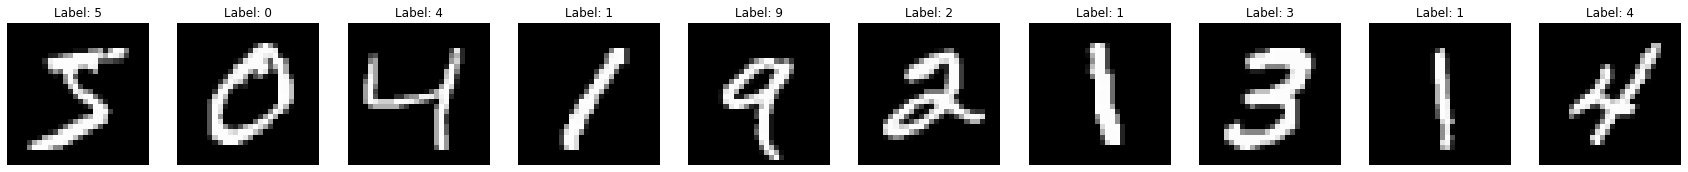

In [15]:
#A simple code to load and show MNIST dataset

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt

def download_dataset(url, filename):
    """
    Download the dataset from the given URL if it is not already present.
    """
    import os
    import requests

    # make sure the directory exists
    os.makedirs(os.path.dirname(filename), exist_ok=True)

    # Check if the file already exists
    # If it does not exist, download it
    # If it does exist, do nothing
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    return True

def load_data():
    """
    Load the MNIST dataset from a gzipped pickle file.
    """ 

    # Download the dataset if it is not already present
    dataset_url = 'https://github.com/unexploredtest/neural-networks-and-deep-learning/raw/refs/heads/master/data/mnist.pkl.gz' #'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    dataset_filename = '../data/mnist.pkl.gz'
    download_dataset(dataset_url, dataset_filename)

    f = gzip.open('../data/mnist.pkl.gz', 'rb')
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    training_data, validation_data, test_data = u.load()
    f.close()
    return (training_data, validation_data, test_data)

def show_data(data , index=0 , ax=None):
    """
    Show the MNIST data.
    """
    # Extract the first image and label from the training data
    image, label = data[0][index], data[1][index] #loads the image and its label

    # data is stored as a flat array of 784 pixels (28x28)
    # Reshape the image to 28x28 pixels
    image = image.reshape(28, 28)

    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

fix , axs = plt.subplots(1 , 10 , figsize=(30,3))
training_data, validation_data, test_data = load_data()

for i in range(10):
    # Show the image and label
    label = show_data(training_data , i ,axs[i])



## ۲. یادگیری ماشین: نگاشت ورودی به خروجی

````{dropdown} مثالی از یادگیری انسان
:animate: fade-in-slide-down

ابتدا کودک عکسها یا شکلهایی از گربه را مشاهده می‌کند.

![](../_static/images/CatKit1.jpeg) ![Cats1Image](../_static/images/Cats1.jpg)

سپس، توان تشخیص گربه را دارد.

![Cats1Image](../_static/images/Cat2.jpeg) ![Cats1Image](../_static/images/Cat3.png)

````

### یادگیری به عنوان پیدا کردن یک تابع

یادگیری ماشین را می‌توان به صورت یافتن یک **تابع** در نظر گرفت که داده‌های ورودی را به خروجی‌های مورد انتظار **نگاشت** می‌دهد.

هدف، یافتن تابعی است مانند:

$$ f(x) → ŷ $$

که برای هر ورودی `x`، خروجی پیش‌بینی‌شده `ŷ` را تولید کند، به‌گونه‌ای که به مقدار واقعی `y` نزدیک باشد.

````{dropdown} مثال: BDT (Boosted Decision Trees)
:animate: fade-in-slide-down

این الگوریتم با استفاده از ترکیب چند درخت تصمیم، سعی می‌کند تابعی را پیدا کند که ویژگی‌های ورودی را به خروجی نگاشت دهد.

![DBT](../_static/images/bdt_example.png)
![BDT Output](../_static/images/bdt_example2.png)

```{note}
توضیحات مربوط به این شکلها را میتوانید در سایت پکیج [scipy](https://scikit-learn.org/stable/modules/tree.html) ملاحظه کنید.
```

````

---

## ۳. شبکه‌های عصبی به عنوان تابع

شبکه‌های عصبی را می‌توان به صورت یک تابع ریاضی قابل آموزش نمایش داد که از ترکیب **ضرب‌های ماتریسی** و **توابع فعال‌سازی غیرخطی** ساخته شده است.

فرض کنیم:

- `x` : بردار ورودی  
- `W₁`, `W₂` : ماتریس وزن‌ها  
- `b₁`, `b₂` : بایاس‌ها  
- `σ` : تابع فعال‌سازی (مثلاً ReLU یا Sigmoid)

فرمول ساده برای یک شبکه با یک لایه پنهان:

$$
f(x) = \sigma_2(W_2 \cdot \sigma_1(W_1 x + b_1) + b_2)
$$


میتوان نمایی شماتیک از این تابع را به صورت زیر نشان داد:

````{dropdown} تصویر تابع شبکه‌ی عصبی

![NN_1HiddenLayer_Schematic](../_static/images/NN_1HiddenLayer_Schematic.png)

````

````{dropdown} توابع فعالسازی

![](../_static/images/ActivationFunctions.png)

````

## ۴. تقریب هر تابع دلخواه

بر اساس قضیه‌ی تقریب جهانی (Universal Approximation Theorem):

> یک شبکه عصبی با تنها یک لایه پنهان و تعداد کافی نرون می‌تواند هر تابع پیوسته را با دقت دلخواه تقریب بزند.

این یعنی:

- حتی اگر تابع مورد نظر پیچیده یا ناشناخته باشد، شبکه عصبی می‌تواند آن را مدل‌سازی کند.
- در عمل، محدودیت‌هایی مثل اندازه شبکه، تعداد داده، یا overfitting وجود دارد، اما اصل توانمندی وجود دارد.

---
### پارامترهای تابع شبکه‌ی عصبی

$$
f(x) = \sigma_2(W_2 \cdot \sigma_1(W_1 x + b_1) + b_2)
$$

تمام اعضاء Wها و bها پارامترهای آزاد هستند.

````{note}

![](../_static/images/NN_NParameters.png)

````

### تابع هزینه و برازش

تابعی شبیه به $\chi^2$ که با کمینه کردن آن بتوان پارمترهای بهینه را یافت.

البته گزینه های دیگری هم وجود دارد:

$$
C_{MST}(W, B, S^r, E^r) = 0.5\sum\limits_j (a^L_j - E^r_j)^2 \\
C_{CE}(W, B, S^r, E^r) = -\sum\limits_j [E^r_j \text{ ln } a^L_j + (1 - E^r_j) \text{ ln }(1-a^L_j)] \\
C_{EXP}(W, B, S^r, E^r) = \tau\text{ }\exp(\frac{1}{\tau} \sum\limits_j (a^L_j - E^r_j)^2)
$$

## ۵. مشتق‌گیری و بهینه‌سازی پارامترها  
هدف اصلی: کمینه‌سازی تابع هزینه (`L`) با تنظیم پارامترهای شبکه (`θ`):  

$$
\theta^* = argmin_\theta \sum_{i=1}^N L(f_\theta(x_i), y_i)
$$

### گرادیان کاهشی

![](../_static/images/GradientDescent.jpg)

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f(\mathbf{x}).$$


### الگوریتم پس‌انتشار (Backpropagation)  
محاسبه گرادیان‌ها با قاعده زنجیره‌ای برای یک شبکه دو لایه:  

1. **محاسبه گرادیان لایه خروجی**:  
   $$
   \frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial f} \cdot \sigma_2' \cdot h_1^T
   $$  
   که در آن `h_1` خروجی لایه پنهان است.  

2. **محاسبه گرادیان لایه پنهان**:  
   $$
   \frac{\partial L}{\partial W_1} = \left(\frac{\partial L}{\partial f} \cdot W_2 \odot \sigma_1'\right) x^T
   $$  